# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [137]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [138]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [139]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [140]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [141]:
from sklearn.model_selection import train_test_split
X = data.iloc[: , :13]
y = data['MEDV']
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes
print(f"Training set size: {X_train.shape} rows")
print(f"Testing set size: {X_test.shape} rows")


Training set size: (404, 13) rows
Testing set size: (102, 13) rows


In [142]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [143]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

## 3. Calculate and print R-squared for both the training and the testing set.

In [144]:
# Calculate R-squared for training and testing sets
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

# Print the R-squared values
print(f"R-squared for Training Set: {train_r2:.4f}")
print(f"R-squared for Testing Set: {test_r2:.4f}")


R-squared for Training Set: 0.7509
R-squared for Testing Set: 0.6688


## 4. Calculate and print mean squared error for both the training and the testing set.

In [145]:
from sklearn.metrics import mean_squared_error

# Generate predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MSE for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print the MSE values
print(f"Mean Squared Error for Training Set: {train_mse:.4f}")
print(f"Mean Squared Error for Testing Set: {test_mse:.4f}")


Mean Squared Error for Training Set: 21.6414
Mean Squared Error for Testing Set: 24.2911


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [146]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for training and testing sets
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print the MAE values
print(f"Mean Absolute Error for Training Set: {train_mae:.4f}")
print(f"Mean Absolute Error for Testing Set: {test_mae:.4f}")


Mean Absolute Error for Training Set: 3.3148
Mean Absolute Error for Testing Set: 3.1891


## Classification Model Evaluation

In [147]:
from sklearn.datasets import load_iris
data = load_iris()

In [148]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [149]:
column_names = data.feature_names

In [150]:
df = pd.DataFrame(data['data'],columns=column_names)

In [151]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [158]:
target = pd.DataFrame(data.target)

In [153]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [154]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [155]:
pip install numpy


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [163]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

# تحميل بيانات Iris
data = load_iris()

# تحويل الميزات إلى DataFrame
column_names = data.feature_names
df = pd.DataFrame(data['data'], columns=column_names)

# تحويل الهدف (target) إلى DataFrame
target = pd.DataFrame(data.target, columns=["class"])

# دمج البيانات مع الهدف
df["class"] = target

# تقسيم البيانات إلى ميزات (X) وهدف (y)
X = df.drop(columns=["class"])  # الميزات
y = df["class"]  # الهدف

# تقسيم البيانات إلى 80% تدريب و 20% اختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# طباعة حجم كل جزء
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")


Training set size: 120 rows
Testing set size: 30 rows


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [164]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

# تحميل بيانات Iris
data = load_iris()

# تحويل الميزات إلى DataFrame
column_names = data.feature_names
df = pd.DataFrame(data['data'], columns=column_names)

# تحويل الهدف (target) إلى DataFrame
target = pd.DataFrame(data.target, columns=["class"])

# دمج البيانات مع الهدف
df["class"] = target

# تقسيم البيانات إلى ميزات (X) وهدف (y)
X = df.drop(columns=["class"])  # الميزات
y = df["class"]  # الهدف

# تقسيم البيانات إلى 80% تدريب و 20% اختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# إنشاء نموذج Logistic Regression
model = LogisticRegression(max_iter=200)  # زيادة عدد التكرارات لتجنب مشاكل التقارب

# تدريب النموذج
model.fit(X_train, y_train)

# التنبؤ على بيانات التدريب والاختبار
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# طباعة بعض النتائج
print("Predictions on Training Set:", y_train_pred[:10])  # عرض أول 10 قيم متوقعة
print("Predictions on Testing Set:", y_test_pred[:10])  # عرض أول 10 قيم متوقعة


Predictions on Training Set: [0 1 1 0 1 2 1 2 2 2]
Predictions on Testing Set: [0 2 1 1 0 1 0 0 2 1]


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [165]:
from sklearn.metrics import accuracy_score

# حساب دقة النموذج على بيانات التدريب والاختبار
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# طباعة النتائج
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.97
Testing Accuracy: 0.97


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [166]:
from sklearn.metrics import balanced_accuracy_score

# حساب الدقة المتوازنة على بيانات التدريب والاختبار
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

# طباعة النتائج
print(f"Balanced Training Accuracy: {train_balanced_accuracy:.2f}")
print(f"Balanced Testing Accuracy: {test_balanced_accuracy:.2f}")


Balanced Training Accuracy: 0.97
Balanced Testing Accuracy: 0.97


## 10. Calculate and print the precision score for both the training and the testing set.

In [167]:
from sklearn.metrics import precision_score

# حساب الدقة (Precision) على بيانات التدريب والاختبار
train_precision = precision_score(y_train, y_train_pred, average="weighted")
test_precision = precision_score(y_test, y_test_pred, average="weighted")

# طباعة النتائج
print(f"Precision Score (Training): {train_precision:.2f}")
print(f"Precision Score (Testing): {test_precision:.2f}")


Precision Score (Training): 0.98
Precision Score (Testing): 0.97


## 11. Calculate and print the recall score for both the training and the testing set.

In [168]:
from sklearn.metrics import recall_score

# حساب الاسترجاع (Recall) على بيانات التدريب والاختبار
train_recall = recall_score(y_train, y_train_pred, average="weighted")
test_recall = recall_score(y_test, y_test_pred, average="weighted")

# طباعة النتائج
print(f"Recall Score (Training): {train_recall:.2f}")
print(f"Recall Score (Testing): {test_recall:.2f}")


Recall Score (Training): 0.97
Recall Score (Testing): 0.97


## 12. Calculate and print the F1 score for both the training and the testing set.

In [169]:
from sklearn.metrics import f1_score

# حساب F1 Score على بيانات التدريب والاختبار
train_f1 = f1_score(y_train, y_train_pred, average="weighted")
test_f1 = f1_score(y_test, y_test_pred, average="weighted")

# طباعة النتائج
print(f"F1 Score (Training): {train_f1:.2f}")
print(f"F1 Score (Testing): {test_f1:.2f}")


F1 Score (Training): 0.97
F1 Score (Testing): 0.97


## 13. Generate confusion matrices for both the training and the testing set.

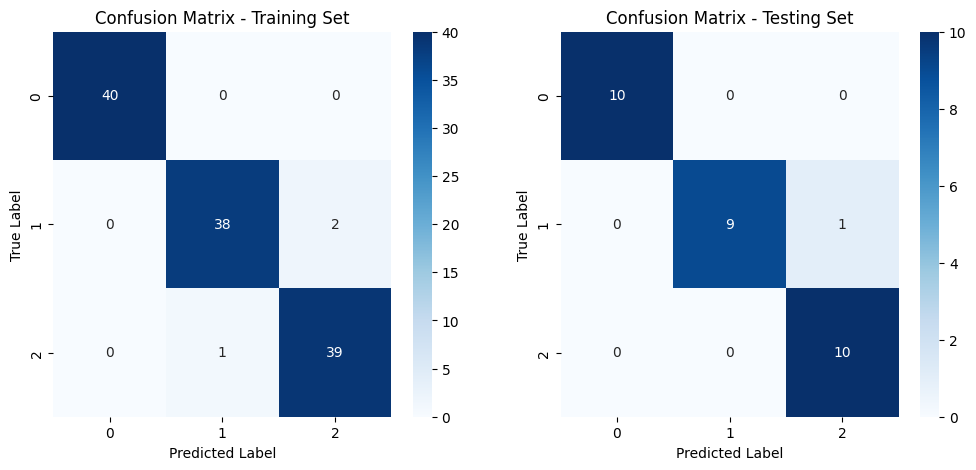

In [170]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# حساب مصفوفات الارتباك
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# إنشاء مخططات لمصفوفات الارتباك
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# رسم مصفوفة الارتباك لبيانات التدريب
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix - Training Set")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# رسم مصفوفة الارتباك لبيانات الاختبار
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Confusion Matrix - Testing Set")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

# عرض المخططات
plt.show()


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# تعريف النماذج
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# تخزين النتائج لكل نموذج
results = {}

for model_name, model in models.items():
    # تدريب النموذج
    model.fit(X_train, y_train)
    
    # التوقعات
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # حساب المقاييس
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred, average="weighted")
    test_precision = precision_score(y_test, y_test_pred, average="weighted")
    train_recall = recall_score(y_train, y_train_pred, average="weighted")
    test_recall = recall_score(y_test, y_test_pred, average="weighted")
    train_f1 = f1_score(y_train, y_train_pred, average="weighted")
    test_f1 = f1_score(y_test, y_test_pred, average="weighted")

    # حفظ النتائج
    results[model_name] = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train Precision": train_precision,
        "Test Precision": test_precision,
        "Train Recall": train_recall,
        "Test Recall": test_recall,
        "Train F1 Score": train_f1,
        "Test F1 Score": test_f1,
    }

# طباعة النتائج
for model_name, metrics in results.items():
    print(f"\n🔹 {model_name} Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")



🔹 Logistic Regression Results:
Train Accuracy: 0.97
Test Accuracy: 0.97
Train Precision: 0.98
Test Precision: 0.97
Train Recall: 0.97
Test Recall: 0.97
Train F1 Score: 0.97
Test F1 Score: 0.97

🔹 Decision Tree Results:
Train Accuracy: 1.00
Test Accuracy: 0.97
Train Precision: 1.00
Test Precision: 0.97
Train Recall: 1.00
Test Recall: 0.97
Train F1 Score: 1.00
Test F1 Score: 0.97

🔹 Random Forest Results:
Train Accuracy: 1.00
Test Accuracy: 0.93
Train Precision: 1.00
Test Precision: 0.93
Train Recall: 1.00
Test Recall: 0.93
Train F1 Score: 1.00
Test F1 Score: 0.93

🔹 SVM Results:
Train Accuracy: 0.98
Test Accuracy: 0.97
Train Precision: 0.98
Test Precision: 0.97
Train Recall: 0.98
Test Recall: 0.97
Train F1 Score: 0.98
Test F1 Score: 0.97

🔹 KNN Results:
Train Accuracy: 0.97
Test Accuracy: 1.00
Train Precision: 0.97
Test Precision: 1.00
Train Recall: 0.97
Test Recall: 1.00
Train F1 Score: 0.97
Test F1 Score: 1.00
